In [51]:
import cv2 # opencv 
from PIL import Image   # pillow 
import numpy as np 
# 

In [52]:
# pwd 

In [54]:
# ls 

In [4]:
path = r"C:\Users\Ranjit\Desktop\JECRC-20april2024\CNN\Data\images\cats\cat_1.jpg"

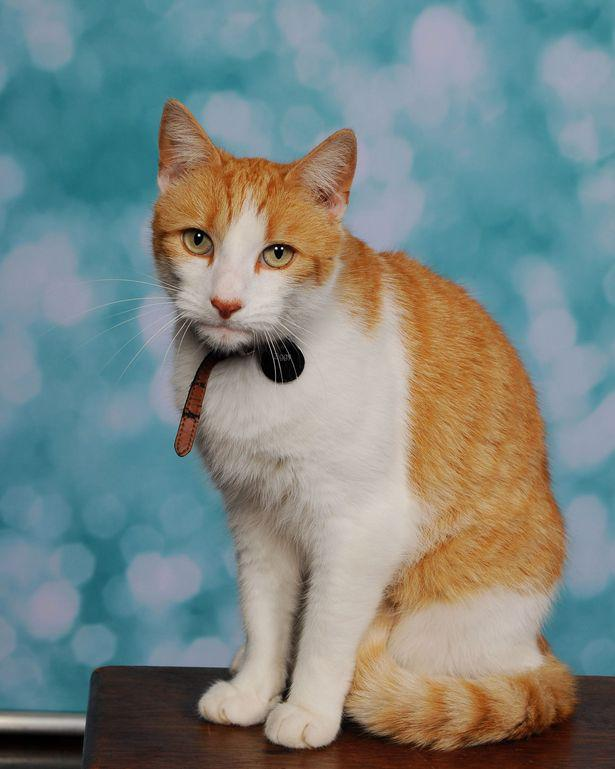

In [5]:
cat  = Image.open(path)
cat 

In [6]:
cat_image  = np.array(cat)
cat_image 

array([[[ 94, 143, 158],
        [ 94, 143, 158],
        [ 97, 143, 159],
        ...,
        [ 83, 147, 159],
        [ 84, 148, 160],
        [ 85, 149, 161]],

       [[ 92, 141, 156],
        [ 93, 142, 157],
        [ 96, 142, 158],
        ...,
        [ 82, 146, 158],
        [ 84, 148, 160],
        [ 84, 148, 160]],

       [[ 90, 139, 154],
        [ 91, 140, 155],
        [ 94, 140, 155],
        ...,
        [ 82, 146, 158],
        [ 83, 147, 159],
        [ 84, 148, 160]],

       ...,

       [[ 43,  45,  42],
        [ 40,  45,  41],
        [ 41,  43,  40],
        ...,
        [ 58,  43,  40],
        [ 58,  43,  40],
        [ 58,  43,  40]],

       [[ 38,  40,  37],
        [ 35,  40,  36],
        [ 35,  37,  34],
        ...,
        [ 53,  38,  35],
        [ 51,  36,  33],
        [ 50,  35,  32]],

       [[ 35,  35,  35],
        [ 34,  36,  35],
        [ 35,  35,  35],
        ...,
        [ 54,  39,  36],
        [ 53,  38,  35],
        [ 58,  43,  40]]

In [7]:
cat_image.shape 

(769, 615, 3)

In [8]:
img_dir_path = r"C:\Users\Ranjit\Desktop\Data_science_coding_examples\Deep learning\CNN\Dog_cat\Data\images"

In [9]:
import os 

In [10]:
path_dict = {'cats':[],'dogs':[]}
for dir in os.listdir(img_dir_path): 
    directory_path = os.path.join(img_dir_path,dir)
    for img_name in os.listdir(directory_path):
        image_path = os.path.join(directory_path,img_name)
        path_dict[dir].append(image_path)

In [56]:
# path_dict 

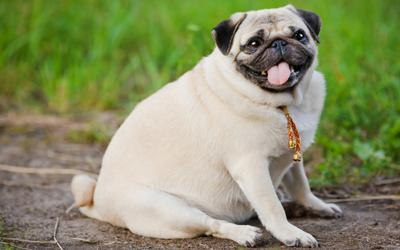

In [59]:
path_dict['dogs'][0]
Image.open(path_dict['dogs'][28])

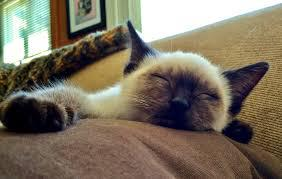

In [50]:

Image.open(path_dict['cats'][23])

In [49]:
path_dict['dogs'][25]

img_45 = cv2.imread(path_dict['dogs'][45])
print(img_45.shape)
# img_45

(720, 1280, 3)


In [15]:
resized_img  = cv2.resize(img_45,(224,224))
print(img_45.shape)
print(resized_img.shape)


(720, 1280, 3)
(224, 224, 3)


In [16]:
import matplotlib.pyplot as plt 

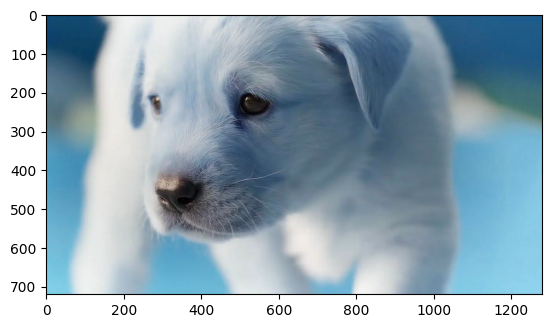

In [17]:
plt.imshow(img_45)

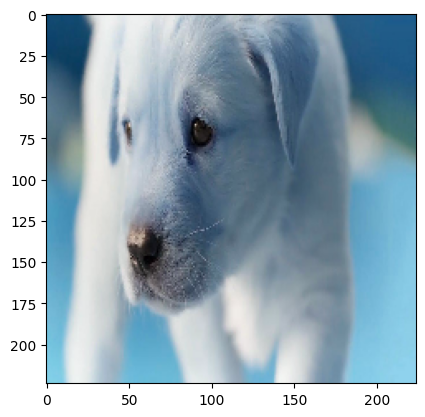

In [18]:
plt.imshow(resized_img)


In [19]:
x = []  # image in the form of array 
y = []  # labels 
for key , value in path_dict.items(): 
    for img_path in value: 
        img_arr  = cv2.imread(img_path)
        resized_image = cv2.resize(img_arr,(224,224))
        x.append(resized_image)
        y.append(key)
    

In [20]:
len(x)  ,len(y)

(697, 697)

In [21]:
x = np.array(x)

In [22]:
x.ndim  

4

In [63]:
# y  

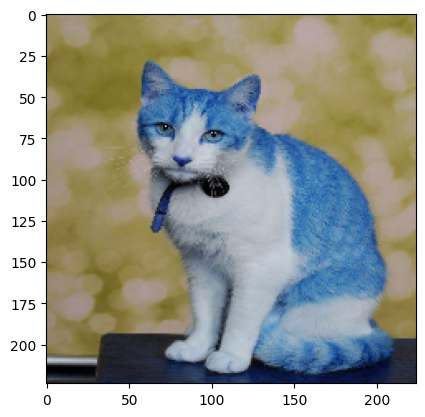

In [23]:
plt.imshow(x[0]/255.0)

In [24]:
x2 = x/255.0 
# x , y 

In [86]:
# cats = 1 , dogs = 0 
Y = [1 if item =="cats" else 0 for item in y]
Y = np.array(Y)

In [26]:
from sklearn.model_selection import train_test_split

In [87]:
x_train,x_test, y_train,y_test =train_test_split(x,Y,test_size=0.15,random_state=42)

In [88]:
## normalization 0 - 1 
X_train = x_train/255.0   
X_test = x_test/255.0 


In [76]:
x_train.shape 

(592, 224, 224, 3)

In [75]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras import layers 

In [78]:
# Define the CNN architecture
model = Sequential([
    # Convolutional layers
    layers.Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(68, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3,3), activation='relu'),

    #flattening layer
    layers.Flatten(),

    # Dense layers for classification
    layers.Dense(24, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print model summary for a detailed overview
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 111, 111, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 68)        │          39,236 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 54, 54, 68)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 32)          │          19,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 24)                  │       2,076,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              25 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,137,365 (8.15 MB)

 Trainable params: 2,137,365 (8.15 MB)

 Non-trainable params: 0 (0.00 B)

In [89]:
history = model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.5217 - loss: 0.9560 - val_accuracy: 0.4381 - val_loss: 0.6994
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.5536 - loss: 0.6857 - val_accuracy: 0.6000 - val_loss: 0.6912
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.7123 - loss: 0.6816 - val_accuracy: 0.4762 - val_loss: 0.7066
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.7110 - loss: 0.6294 - val_accuracy: 0.5714 - val_loss: 0.6786
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.8368 - loss: 0.4748 - val_accuracy: 0.6000 - val_loss: 0.7811
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.8745 - loss: 0.3355 - val_accuracy: 0.6571 - val_loss: 0.8565
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.9159 - loss: 0.2752 - val_accuracy: 0.6000 - val_loss: 1.1672
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.9289 - loss: 0.1631 - val_accuracy: 0.6571 - val_loss:

In [91]:
### predicition 
prediction = model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 363ms/step


In [96]:
pred = ( prediction>0.5 ).astype(int).ravel()  # probability 0 - 1

In [97]:
pred   # predicted 

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0])

In [98]:
y_test   # actual 

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1])

In [99]:
from sklearn.metrics import confusion_matrix, classification_report 

In [100]:
confusion_matrix(y_test,pred)  # 50 % 

array([[35, 11],
       [35, 24]], dtype=int64)

In [101]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.50      0.76      0.60        46
           1       0.69      0.41      0.51        59

    accuracy                           0.56       105
   macro avg       0.59      0.58      0.56       105
weighted avg       0.60      0.56      0.55       105



##### 

In [29]:
ls =  [25,63,55,66,88,45,96,45,5,45,96,41,36,52]
sum(ls) 

758

In [30]:
len(ls)

14

In [31]:
sum(ls)/len(ls) 

54.142857142857146

In [32]:
total_sum = 0 
count = 0 
for item in ls: 
    total_sum = total_sum + item  
    count = count + 1 
print(round(total_sum/count,2))

54.14


In [33]:
ls =  [25,63,55,66,88,45,96,45,5,45,96,41,36,52]
count = 0 
for item in ls: 
    if item % 2 ==0:      # 25 % 2 == 0 
        count = count + 1 
print(count)      

6


In [34]:
ls =  [25,63,55,66,88,45,96,45,5,45,96,41,36,52]
count = 0
total_sum = 0 
for item in ls: 
    if item % 2 ==0:      # 25 % 2 == 0 
        count += 1   #count = count + 1
        total_sum += item    #total_sum = total_sum + item 
print(f"your average is : {round(total_sum/count,2)}")      

your average is : 72.33


In [35]:
student_details = {"name":['mohan','rohan','mohit','karan'], 
                  "marks":[52,63,41,80],
                  "subject":'math'} 
student_details 

{'name': ['mohan', 'rohan', 'mohit', 'karan'],
 'marks': [52, 63, 41, 80],
 'subject': 'math'}

In [36]:
# find out total no. of student  
len(student_details['name'])

4

In [37]:
## add details of one more student 
# "Rajveer singh"  , 85  
student_details['name'].append('Rajveer singh') 
student_details['marks'].append(85) 

In [38]:
student_details = {"name":['mohan','rohan','mohit','karan'], 
                  "marks":[52,63,41,80],
                  "subject":'math'} 
student_details['name'].insert(0,'Rajveer singh') 
student_details['marks'].insert(0,85) 

print(student_details)

{'name': ['Rajveer singh', 'mohan', 'rohan', 'mohit', 'karan'], 'marks': [85, 52, 63, 41, 80], 'subject': 'math'}


In [39]:
student_details = {"name":['mohan','rohan','mohit','karan'], 
                  "marks":[52,63,41,80],
                  "subject":'math'}  
student_details['name'][2] = "rohit" 
print(student_details)

{'name': ['mohan', 'rohan', 'rohit', 'karan'], 'marks': [52, 63, 41, 80], 'subject': 'math'}


In [40]:
ls = ['mohan','rohan','mohit','karan'] 
ls[2] = "rohit"
print(ls) 

['mohan', 'rohan', 'rohit', 'karan']


In [41]:
# built in  print , len,  append  insert 
# user defined  

In [42]:
# two no add function   
def add_two_num(num1,num2):
    result = num1 + num2
    return result  

# call 
n1 = int(input("enter first number : "))
n2 = int(input("enter second number : "))
add_two_num(num1=n1,num2=n2)

enter first number :  25
enter second number :  25


50

In [43]:
## single input 


def is_even(num):
    if num%2 == 0: 
        print("your number is even!")
    else: 
        print("your number is odd!")  

is_even(27)

your number is odd!


In [44]:
# n = int(input('plz enter any number : '))

In [45]:
# 2 * 1 = 2 
# 2 * 2 = 4   
for i in range(1,11): 
    print(5*i)

5
10
15
20
25
30
35
40
45
50
